## Clustering with K-Means

### Import libraries and load data

In [ ]:
import sklearn
print(sklearn.__version__)

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load data
datadir_prep = 'dataset_prepared'
combined_df = pd.read_csv(os.path.join(datadir_prep, 'prepared_data.csv'))

clustering_df = combined_df[['Recency', 'Frequency', 'TotalAmount', 'Duration']].dropna().reindex().astype(int)
combined_df, clustering_df

(        UserID  Gender    State ReferralSource   BirthDate State_Grouped  \
 0            3  Female   Tehran  Acquaintances  1984-11-07        Tehran   
 1            8    Male   Tehran  Acquaintances  1985-09-15        Tehran   
 2           14    Male   Tehran  Acquaintances  1977-09-29        Tehran   
 3           17  Female   Tehran  Acquaintances  1946-10-15        Tehran   
 4           18  Female   Tehran  Acquaintances  1955-12-28        Tehran   
 ...        ...     ...      ...            ...         ...           ...   
 221172  262138  Female  Isfahan    Application  1996-02-28         Other   
 221173  262139    Male   Tehran    Application  1978-07-01        Tehran   
 221174  262140    Male   Tehran    Application  1975-12-22        Tehran   
 221175  262141    Male     Fars    Application  1994-08-22         Other   
 221176  262143    Male   Tehran       Agencies  1971-04-01        Tehran   
 
          Age  TotalAmount  Frequency  Recency  Duration  Recency_cat  \
 

### Apply the Elbow method to find the optimal value of k

Processing k = 2
Inertia = 8.38299756497021e+18
Labels = [0 0 0 ... 0 0 0]
Silhouette score =  0.9982526441403553
Processing k = 3
Inertia = 4.5175821209568425e+18
Labels = [0 0 0 ... 0 0 0]
Silhouette score =  0.9641969175823171
Processing k = 4
Inertia = 2.723953193613826e+18
Labels = [0 0 0 ... 0 0 0]
Silhouette score =  0.9494035144339857
Processing k = 5
Inertia = 1.6327584524049723e+18
Labels = [0 0 0 ... 0 0 0]
Silhouette score =  0.8890600743067395
Processing k = 6
Inertia = 9.99186245849546e+17
Labels = [5 5 5 ... 5 5 5]
Silhouette score =  0.831592650472599
Processing k = 7
Inertia = 6.988395141685859e+17
Labels = [5 5 5 ... 5 5 0]
Silhouette score =  0.7808225008521852
Processing k = 8
Inertia = 4.9132882627891686e+17
Labels = [5 5 0 ... 5 5 0]
Silhouette score =  0.7424071775427518
Processing k = 9
Inertia = 3.8300975043504557e+17
Labels = [5 5 0 ... 5 5 0]
Silhouette score =  0.7162285730815076


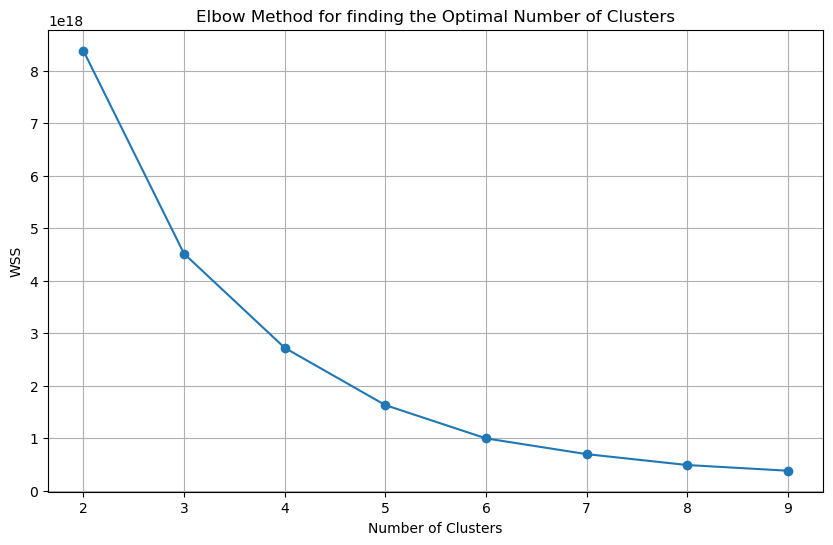

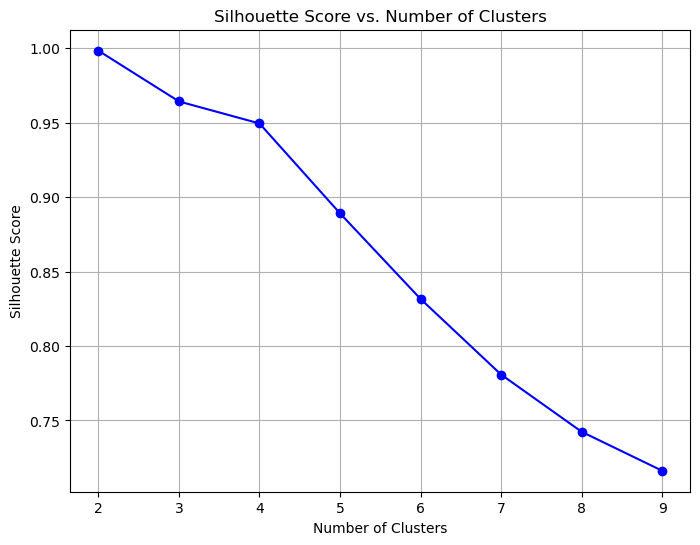

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score

figdir = 'figures'
os.makedirs(figdir, exist_ok=True)

nb_clusters = range(2, 10)

wss = [] # store Within-Cluster Sum of Squares values
sil_scores = [] # store the silhouette scores for each number of clusters
dbi_scores = [] # store the Davies-Bouldin index for internal validation: lower -> cluster is more compact and separated

# run on a sample to reduce time
clustering_df_sample = clustering_df.sample(n=30000, random_state=42)

for k in nb_clusters:
  print('Processing k =', k)
  kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=500, tol=0.0001, random_state=111, algorithm='lloyd')
  kmeans.fit(clustering_df_sample)

  inertia = kmeans.inertia_
  print("Inertia =", inertia)
  wss.append(inertia)

  # predict the cluster labels
  labels = kmeans.predict(clustering_df_sample)
  print('Labels =', labels)

  silscore = silhouette_score(clustering_df_sample, labels)
  print('Silhouette score = ', silscore)
  sil_scores.append(silscore)

  dbi = davies_bouldin_score(clustering_df_sample, labels)
  print('Davies-Bouldin score = ', dbi)
  dbi_scores.append(dbi)


# plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(nb_clusters, wss, marker='o')
plt.title('Elbow Method for finding the Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.xticks(nb_clusters)
plt.grid(True)
plt.savefig('elbow.png', dpi=450)
plt.show()

# plot the silhouette scores with numbers of clusters
plt.figure(figsize=(8, 6))
plt.plot(nb_clusters, sil_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(nb_clusters)
plt.grid(True)
plt.savefig('silhouette.png', dpi=450)
plt.show()

# plot the DBI with numbers of clusters
plt.figure(figsize=(8, 6))
plt.plot(nb_clusters, dbi_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xticks(nb_clusters)
plt.grid(True)
plt.savefig('dbi.png', dpi=450)
plt.show()


### Select value of k, group data by cluster and calculate mean for each score